# 1 Complete Dictionary Learning
## 1.1 Experimental Validation

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import generator

%config InlineBackend.figure_format='retina'

In [2]:
def four_norm_maximization_generator(size):
    current = generator.get_random_orthogonal(size)
    yield current
    while True:
        delta_current = current * current * current
        left, _, right = np.linalg.svd(delta_current, compute_uv=True)
        projection = left @ right
        current = projection
        yield current

In [40]:
def dictionary_learning_generator(observations):
    current = generator.get_random_orthogonal(len(observations))
    yield current
    while True:
        matched = current @ observations
        delta_current = (matched * matched * matched) @ observations.T
        left, _, right = np.linalg.svd(delta_current, compute_uv=True)
        projection = left @ right
        current = projection
        yield current

### 1.1.1 $\ell^4$-maximization on Orthogonal Group

In [41]:
ITERATIONS = 15
SIZE = 100

objective_values = []

updates = generator.four_norm_maximization_iterations(SIZE)
for current in itertools.islice(updates, ITERATIONS):
    value = generator.sum_of_fourth_powers(current) / SIZE
    objective_values.append(value)

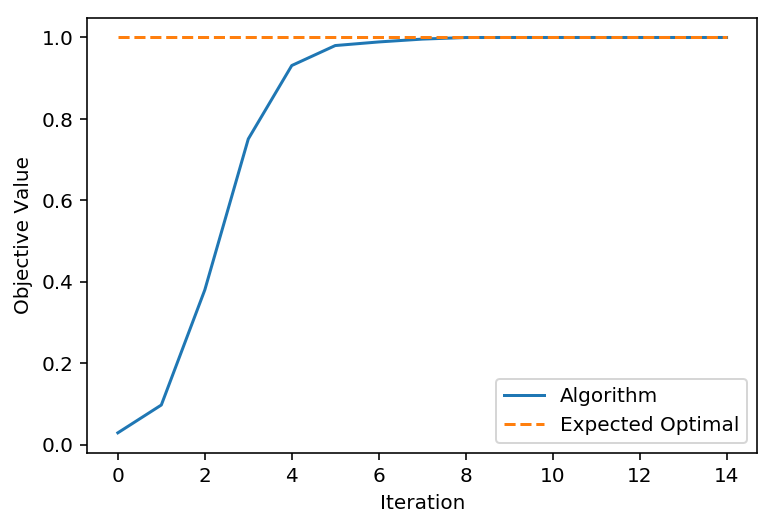

In [42]:
scale = np.arange(ITERATIONS)
plt.plot(scale, objective_values)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.legend(['Algorithm', 'Expected Optimal'])
plt.show()

### 1.1.2 Dictionary Learning via the MSP Algorithm

In [50]:
FEATURES = 100
SAMPLES = 40000
THETA = 0.3
ITERATIONS = 30

observations, true_dictionary, true_samples = \
    generator.random_dictionary_learning_instance(
        FEATURES, SAMPLES, THETA)

In [51]:
observation_matches = []
true_matches = []

updates = dictionary_learning_generator(observations)
for current in itertools.islice(updates, ITERATIONS):
    value = generator.sum_of_fourth_powers(current @ observations) / (3 * FEATURES * SAMPLES * THETA)
    observation_matches.append(value)

    value = generator.sum_of_fourth_powers(current @ true_dictionary) / SIZE
    true_matches.append(value)

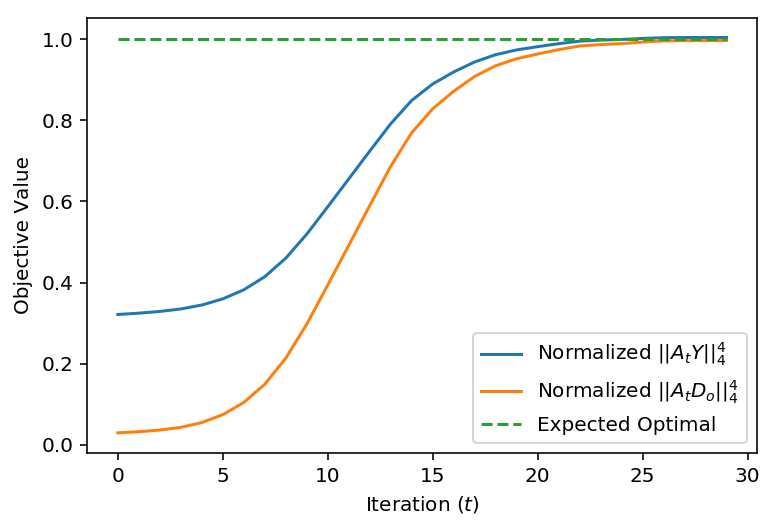

In [57]:
scale = np.arange(ITERATIONS)
plt.plot(scale, observation_matches)
plt.plot(scale, true_matches)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.xlabel('Iteration ($t$)')
plt.ylabel('Objective Value')
plt.legend(['Normalized $|| A_t Y||_4^4$', 'Normalized $|| A_t D_o||_4^4$', 'Expected Optimal'])
plt.show()